In [11]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import time
import model
import numpy as np
import numpy.random as rn
import gen_data
from scipy.linalg import qr
import helper as hlp
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
# M = (w_star_norm / alpha)^2 + w_star_norm**2 / lr
# kmin = 2*(n/(2d-2))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
n_test_plus = 10000
dim = 2
alpha = 0.1
gamma = 1
vi = 1
sig = 0
d = 3
k = d * 100

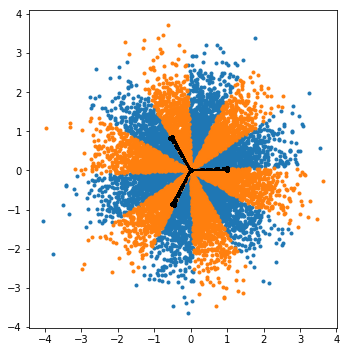

In [47]:
## creating w

w = np.zeros([2*k, dim])
rot = 1/100
rot = rot*2*np.pi
for i in range(int(k/d)):
    for j in range(d):
        dev_0 = 0#rn.normal(0, sig)
        dev_1 = 0#rn.normal(0, sig)
        angle = j/d*2*np.pi
        w[i*d+j, 0] = np.cos(angle + dev_0)
        w[i*d+j, 1] = np.sin(angle + dev_0)
        w[k+i*d+j, 0] = np.cos(angle + rot + dev_1)
        w[k+i*d+j, 1] = np.sin(angle + rot + dev_1)
      
#for i in range(2*k):
#    w[i, :] = w[i, :] / np.sqrt(np.sum(w[i, :]**2))
        
plot_x, plot_y = 5,5
n0, n1 = 1, 1
fig, axes = plt.subplots(figsize=(plot_x*n1, plot_y*n0), nrows=n0, ncols = n1)
fig.tight_layout(h_pad = 5)

x_test_plus = rn.normal(0, 1, [n_test_plus, dim])
y_test_plus = hlp.compute_f(w, x_test_plus, alpha)

ax = axes
ax.plot(x_test_plus[:, 0][np.argwhere(y_test_plus==0)], x_test_plus[:, 1][np.argwhere(y_test_plus==0)], '.')
ax.plot(x_test_plus[:, 0][np.argwhere(y_test_plus==1)], x_test_plus[:, 1][np.argwhere(y_test_plus==1)], '.')
for i in range(k):
    ax.plot([0,w[i, 0]], [0,w[i, 1]], 'k.-')
    ax.plot([0,w[i+k, 0]], [0,w[i+k, 1]], 'k.--')



### Running test:  two_dim_d_3_k_300 

Dataset Parameters:
     p = 2 (input dimension)
     n = 10000 (number of training examples)
     gamma = 1 (1 / |w*|
     pi_nonsep = 0.5 (fraction of non-separable examples)
Network Parameters:
     k = 300  (hidden layer width is 2k)
     alpha = 0.1 (leaky relu parameter)
Optimization Parameters:
     eta = 0.01 (learning rate)

Components of bound for the number of non-zero steps M:
     |w*|^2 / alpha^2 = 100.000
     |w*|^2 / min(eta, sqrt(eta)) = 100.000
Value for R, bound on initial weights norm:
     1/sqrt(2k) = 0.041
To guarantee expressiveness, k should be at least:
     2*(n/(2d-2)) = 10000
     k =  300


*** Configuring

Configs:
 {'print_step': 50, 'break_thresh': 0, 'res_path': 'C:/Users/Shira/Documents/PhD/deepLearning/sim/sss/res/', 'training_epochs': 10000, 'k': 300, 'learning_rate': 0.01, 'beta': 0, 'make_switch': 300, 'n_train': 10000, 'gamma': 1, 'n_test': 5, 'pi_nonsep': 0.5, 'save_sbs': False, 'batch_size': 1, 'name': 

KeyboardInterrupt: 

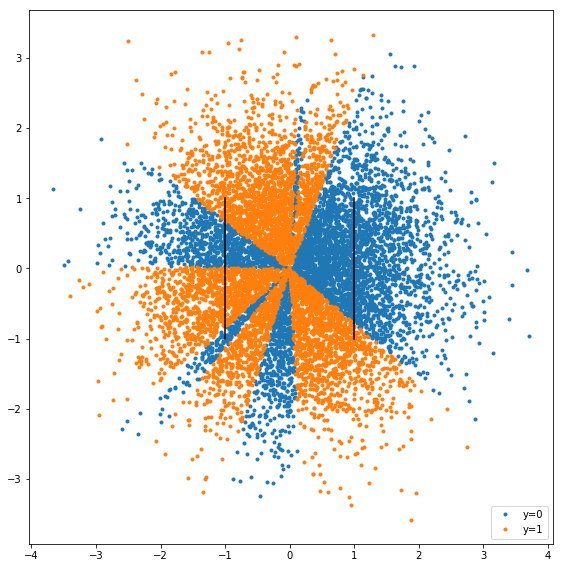

In [48]:
from lin_sep_with_switch import optimize
import gen_data 
import helper as hlp

cfg = {
    # dataset
    'dim' : dim,
    'n_train' : 10000,
    'n_test' : 5,
    'pi_nonsep' : 0.5,
    'make_switch' : False,
    'gamma' : 1,

    # network
    'k' : k,
    'alpha' : alpha,
    
    # optimization
    'beta' : 0, # l_2 weight regularization
    'batch_size' : 1,
    'break_thresh' : 0,
    'learning_rate' : 0.01,
    'training_epochs' : 10000,

    # meta
    'save_step' : 10,
    'print_step' : 50,
    'save_sbs' : False,
    'res_path' : 'C:/Users/Shira/Documents/PhD/deepLearning/sim/sss/res/',
    #'res_path' : 'C:/Users/shirak/Documents/PhD/deepLearning/sim/sss/res/',
}

basic_test_name = 'two_dim_d_' + str(d) + '_k_'

for par in pars:
    tf.reset_default_graph()
    cfg['make_switch'] = par
    test_name = basic_test_name + str(par)
    cfg['name'] = test_name
    start = time.time()
    print("\n\n### Running test: ", test_name, "\n")
    hlp.print_params(cfg)
    data = gen_data.gen_data_theta(cfg, theta)
    hlp.plot_data(data['x_train'], data['y_train'], data['w_star_hat'], data['gamma'])
    w_hat = optimize(cfg, data)
    end = time.time()
    print('\n*** Training time: ', '{:.3f}'.format((end - start)/60), 'minutes')

In [8]:
plt.close('all')